# Project: Investigate a Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I've selected TMDb movie data for my analysis.

Apart from entertainment to audience - making a movie involves lot of decision to be taken in order to make it successful, when we say successful we mean making profit - popular movies in terms of vote_average can be related to being successful as well.

Below are the questions we will be answering by exploring the dataset:
1. Which production company makes successful movies
2. Which genre movies are more successful
3. What is the right runtime to have
4. Which month to release the movie
5. How much to invest based on the genre

In [268]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [269]:
# using pandas to load csv file
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [270]:
df.shape

(10866, 21)

We have 10,866 dataset meaning data of 10,866 movies and each movie have 21 features.

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Looking at the data and info, we can conclude that certain features doesn't really influence the questions that we are trying to answer. We can go ahead and drop those columns.

### Data Cleaning

Afte performing some operation on data, we shall check the data by calling `df.head(1)` and confirm it is working.

In [272]:
del_col = ['id', 'popularity', 'homepage', 'tagline', 'keywords', 'overview', 'vote_count', 'budget_adj', 'revenue_adj']
df.drop(del_col, axis=1, inplace=True)

In [273]:
# check for NaN
df.isnull().sum()

imdb_id                   10
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_average               0
release_year               0
dtype: int64

**Removing movies which have missing genres**

In [274]:
df.dropna(subset=['genres'], inplace=True)

**Removing movies which doesn't have imdb_id**

later we will splitting movie to different rows based on genres, this allows us to groupby using imdb_id and perform more analysis.

In [275]:
df.dropna(subset=['imdb_id'], inplace=True)

In [276]:
# check for NaN
df.isnull().sum()

imdb_id                    0
budget                     0
revenue                    0
original_title             0
cast                      75
director                  39
runtime                    0
genres                     0
production_companies    1012
release_date               0
vote_average               0
release_year               0
dtype: int64

Now the data looks good.

But we still need to extract more information from existing feature which might help us analyse data better.

**Calculating profit**

In [277]:
df['profit'] = df.apply(lambda x: x['revenue']-x['budget'], axis=1)

In [278]:
df.head(1)

,imdb_id,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,profit
0,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015,1363528810


**Extracting month**

In [279]:
# converting date to right format
df['release_date'] = pd.to_datetime(df['release_date'])

In [280]:
df['release_month'] = df.apply(lambda x: x.release_date.month, axis=1)

In [281]:
df.head(1)

,imdb_id,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,profit,release_month
0,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,1363528810,6


<a id='eda'></a>
## Exploratory Data Analysis

**Unique values for each feature in entire dataset**

In [282]:
df.nunique()

imdb_id                 10834
budget                    556
revenue                  4702
original_title          10540
cast                    10690
director                 5054
runtime                   246
genres                   2037
production_companies     7437
release_date             5902
vote_average               71
release_year               56
profit                   5006
release_month              12
dtype: int64

**Who directed the most movies**

In [283]:
df['director'].value_counts()

Woody Allen                                                                                                    45
Clint Eastwood                                                                                                 34
Martin Scorsese                                                                                                29
Steven Spielberg                                                                                               29
Ridley Scott                                                                                                   23
Ron Howard                                                                                                     22
Steven Soderbergh                                                                                              22
Joel Schumacher                                                                                                21
Brian De Palma                                                                          

**Which production company made most movies**

In [284]:
df['production_companies'].value_counts()

Paramount Pictures                                                                                                                                          156
Universal Pictures                                                                                                                                          133
Warner Bros.                                                                                                                                                 84
Walt Disney Pictures                                                                                                                                         75
Metro-Goldwyn-Mayer (MGM)                                                                                                                                    72
Columbia Pictures                                                                                                                                            72
New Line Cinema                         

**Let's see the finance of movies**

In [285]:
df['budget'].describe()

count    1.083500e+04
mean     1.466755e+07
std      3.094749e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [286]:
df['revenue'].describe()

count    1.083500e+04
mean     3.993726e+07
std      1.171513e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.417286e+07
max      2.781506e+09
Name: revenue, dtype: float64

### Budget-Revenue-Profit

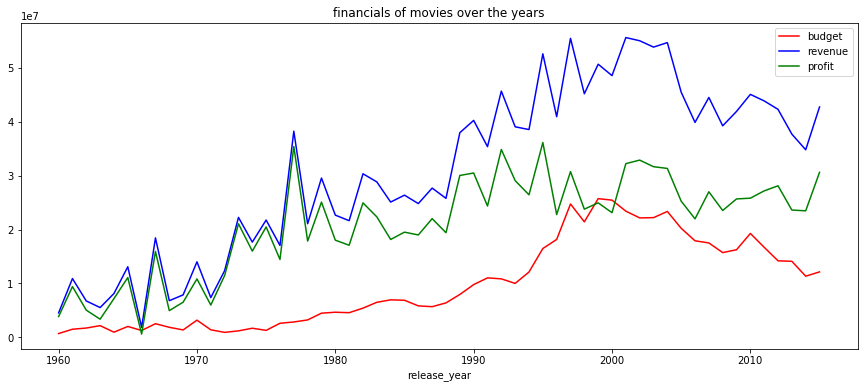

In [287]:
plt.title('financials of movies over the years')
# plt.legend(loc='upper left')
df.groupby(['release_year'])['budget'].mean().plot(figsize=(15,6), color='red', legend='Budget')
df.groupby(['release_year'])['revenue'].mean().plot(figsize=(15,6), color='blue', legend='Revenue')
df.groupby(['release_year'])['profit'].mean().plot(figsize=(15,6),color='green', legend='Profit');

#### Movies having budget and revenue data missing

In [290]:
len(df.query('revenue == 0 and budget == 0')), len(df.query('revenue != 0 or budget != 0'))

(4672, 6163)

In [291]:
len(df.query('revenue != 0 and budget != 0')), len(df.query('revenue == 0 or budget == 0'))

(3855, 6980)

We have substantial number of movie not having budget and revenue.

We can still take average of existing data of these feature and update them but the problem is that would affect our analysis because we are looking at data from 1960 to 2015 which has seen budget and revenue changed over years.

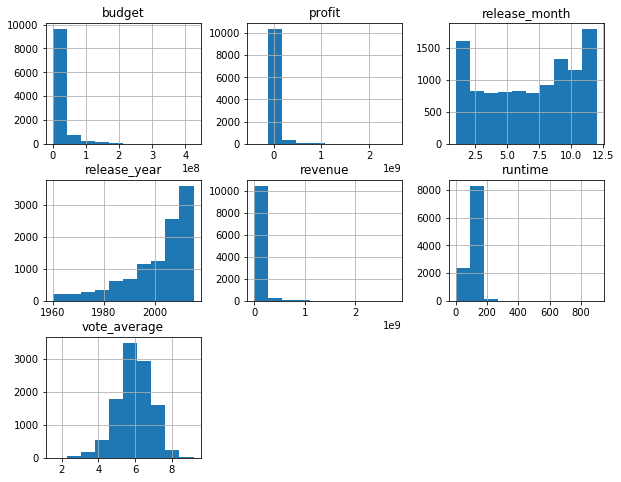

In [292]:
df.hist(figsize=(10,8));

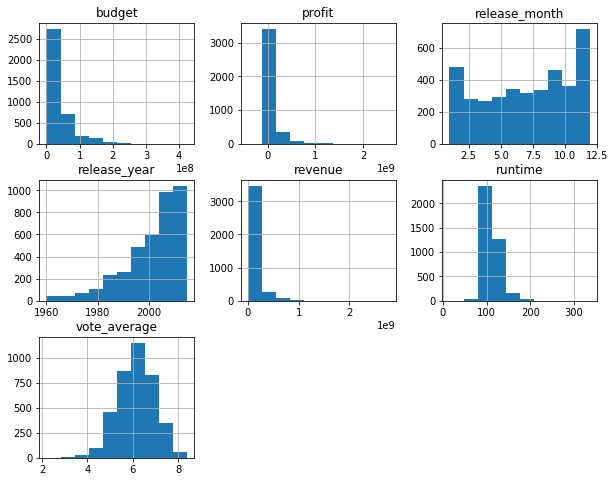

In [293]:
df.query('revenue != 0 and budget != 0').hist(figsize=(10,8));

Let's fill in missing values with average and then check the budget, revenue and profit plot

Since fillna only works for NaN values, first replace all 0 budget and 0 revenue with Nan and then apply fillna

In [294]:
df['budget'] = df['budget'].apply(lambda x: np.NaN if x==0 else x)

In [295]:
df['revenue'] = df['revenue'].apply(lambda x: np.NaN if x==0 else x)

In [296]:
df.isnull().sum()

imdb_id                    0
budget                  5667
revenue                 5985
original_title             0
cast                      75
director                  39
runtime                    0
genres                     0
production_companies    1012
release_date               0
vote_average               0
release_year               0
profit                     0
release_month              0
dtype: int64

now we can see there are 5667 movies with NaN budget and 5985 movies with NaN revenue

In [297]:
df['budget'].fillna(df['budget'].mean(), inplace = True)

In [298]:
df['revenue'].fillna(df['revenue'].mean(), inplace = True)

**Calculating profit again since we have updated budget and revenue with average value**

In [299]:
df['profit'] = df.apply(lambda x: x['revenue']-x['budget'], axis=1)

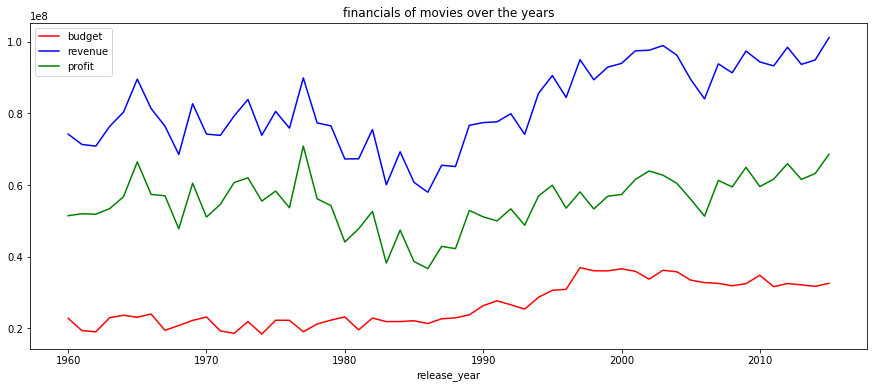

In [300]:
plt.title('financials of movies over the years')
# plt.legend(loc='upper left')
df.groupby(['release_year'])['budget'].mean().plot(figsize=(15,6), color='red', legend='Budget')
df.groupby(['release_year'])['revenue'].mean().plot(figsize=(15,6), color='blue', legend='Revenue')
df.groupby(['release_year'])['profit'].mean().plot(figsize=(15,6),color='green', legend='Profit');

### Popular movie genres over the years

In [301]:
# Check distribution of ratings
df['vote_average'].describe()

count    10835.000000
mean         5.973069
std          0.933835
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

**Unique Genres**

In [302]:
df.genres.value_counts()

Drama                                           712
Comedy                                          711
Documentary                                     312
Drama|Romance                                   289
Comedy|Drama                                    280
Comedy|Romance                                  268
Horror|Thriller                                 259
Horror                                          253
Comedy|Drama|Romance                            222
Drama|Thriller                                  138
Comedy|Family                                   102
Action|Thriller                                 101
Thriller                                         93
Drama|Comedy                                     92
Animation|Family                                 90
Crime|Drama|Thriller                             81
Crime|Drama                                      74
Comedy|Horror                                    72
Drama|Comedy|Romance                             64
Action      

Problem with genres is that we can't do any analysis involving it unless we split genres and create more rows for each movies having more genres seperated by pipe character

### How to split each movie dataset which have multiple genres:

1. loop through all rows
2. select genres value and split by pipe character
3. now create new dataframe and append that to separate dataframe called spread_df

In [304]:
spread_df = pd.DataFrame()

for index in range(df.shape[0]):
    original = df.iloc[index]
    splited = original['genres'].split('|')
    for s in splited:
        temp_df = original.copy()
        temp_df['genres'] = s
        spread_df = spread_df.append(temp_df, ignore_index = True)
        
spread_df.shape

(26937, 14)

In [305]:
spread_df.head(1)

,budget,cast,director,genres,imdb_id,original_title,production_companies,profit,release_date,release_month,release_year,revenue,runtime,vote_average
0,150000000.0,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action,tt0369610,Jurassic World,Universal Studios|Amblin Entertainment|Legenda...,1.363529e+09,2015-06-09,6.0,2015.0,1.513529e+09,124.0,6.5


we ended up with only 20 genres as a result of above operation

In [306]:
spread_df['genres'].nunique()

20

check whether spreading of genres worked by grouping them and compare with original shape

In [307]:
spread_df.groupby(['imdb_id'])['genres'].sum()

imdb_id
tt0035423       ComedyFantasyRomanceScience Fiction
tt0052646                     HorrorScience Fiction
tt0053559                                    Horror
tt0053580        ActionAdventureDramaHistoryWestern
tt0053604                        ComedyDramaRomance
tt0053644                              ComedyFamily
tt0053677                                    Horror
tt0053699                                    Comedy
tt0053716                             ComedyRomance
tt0053719                                    Horror
tt0053729                             ActionWestern
tt0053793                                     Drama
tt0053804                     ActionDramaHistoryWar
tt0053825                 ActionDramaRomanceWestern
tt0053877                        ComedyDramaRomance
tt0053925                            HorrorThriller
tt0053946                              DramaHistory
tt0054022                             ComedyRomance
tt0054033                                    Comedy
tt00

In [308]:
df.shape

(10835, 14)

above shape comparison tells us that our spread worked.

**Now we can check how many movies are released under each genre**

In [309]:
spread_df.genres.value_counts()

Drama              4759
Comedy             3792
Thriller           2908
Action             2380
Romance            1712
Horror             1637
Adventure          1469
Crime              1355
Family             1230
Science Fiction    1225
Fantasy             913
Mystery             810
Animation           697
Documentary         519
Music               407
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres, dtype: int64

Plot the genre for visual understanding

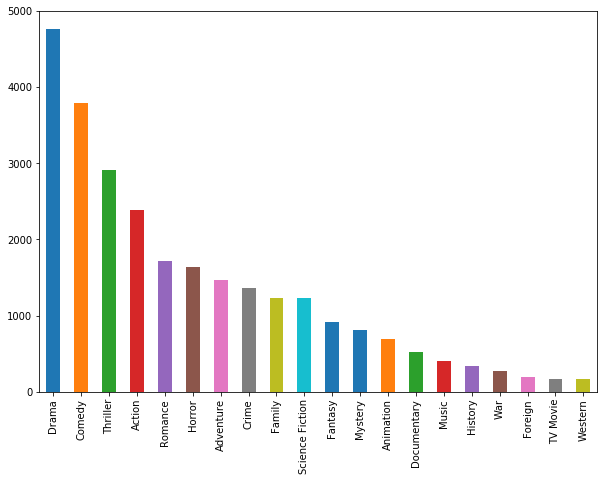

In [310]:
spread_df.genres.value_counts().plot(kind='bar', figsize=(10,7));

# Few other variants
# spread_df.genres.value_counts().plot(kind='bar', figsize=(10,7)).invert_xaxis();
# spread_df.genres.value_counts().plot(kind='bar', figsize=(10,7)).invert_yaxis();

**vote average among genres**

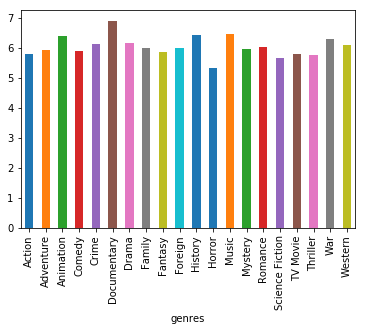

In [311]:
spread_df.groupby(['genres'])['vote_average'].mean().plot(kind='bar');

The above plot doesn't take into account for years, lets do the same analysis over years

**What movies people rate high?**

In [312]:
# spread_df.groupby(['release_year', 'genres'])['vote_average'].mean()

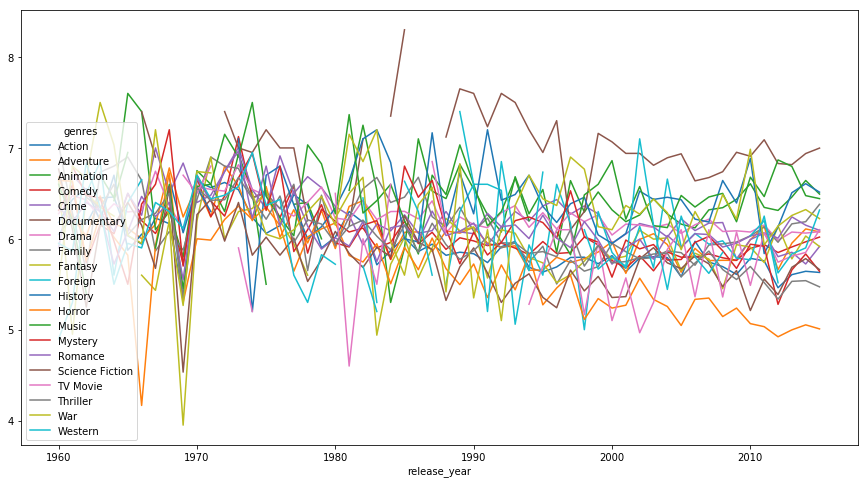

In [313]:
# plt.figure()
spread_df.groupby(['release_year', 'genres'])['vote_average'].mean().unstack().plot(figsize=(15,8));

let's break down above plot by just comparing two genres

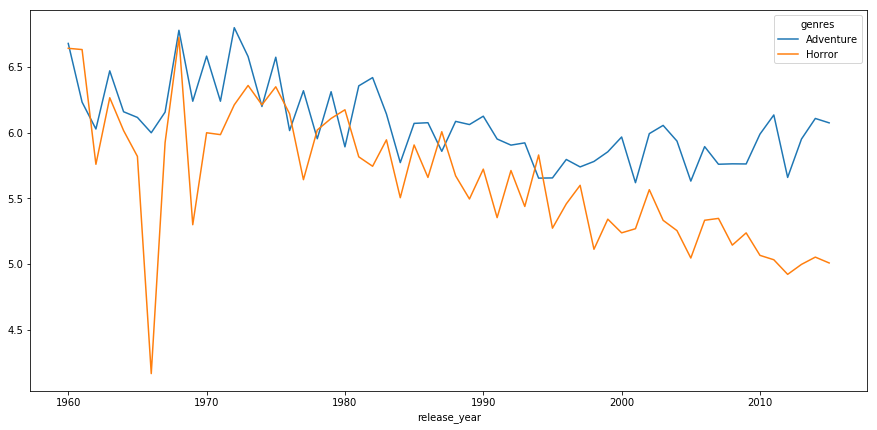

In [314]:
spread_df.query('genres == "Adventure" or genres == "Horror"').groupby(['release_year', 'genres'])['vote_average'].mean().unstack().plot(figsize=(15,7));

looks like people started rating low for horror movies after 1987 and while adventure movies almost maintained their rating.

**Let's see how movies are invested for same genre movies over the years**

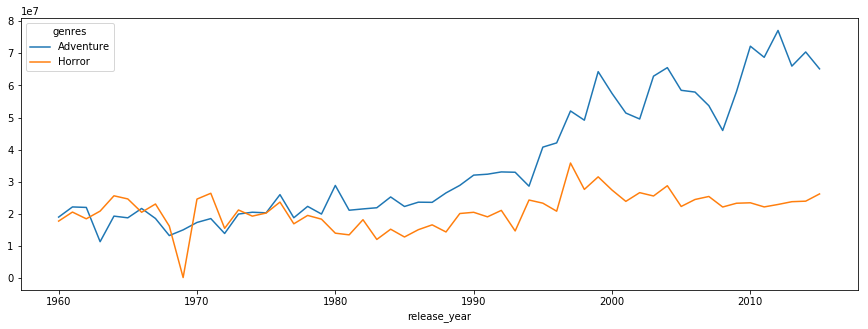

In [317]:
spread_df.query('genres == "Adventure" or genres == "Horror"').groupby(['release_year', 'genres'])['budget'].mean().unstack().plot(figsize=(15,5));

budget for Adventure movies increased after 1997 when compared to Horror

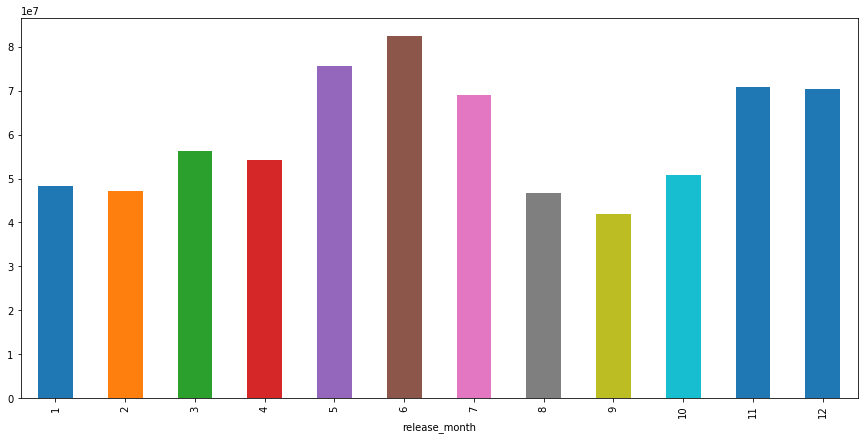

In [318]:
df.groupby(['release_month'])['profit'].mean().plot(kind='bar', figsize=(15,7));

movies released in June made more profit

### Let's look at data for 2015

**Comparing revenue for same genre movies over the years**

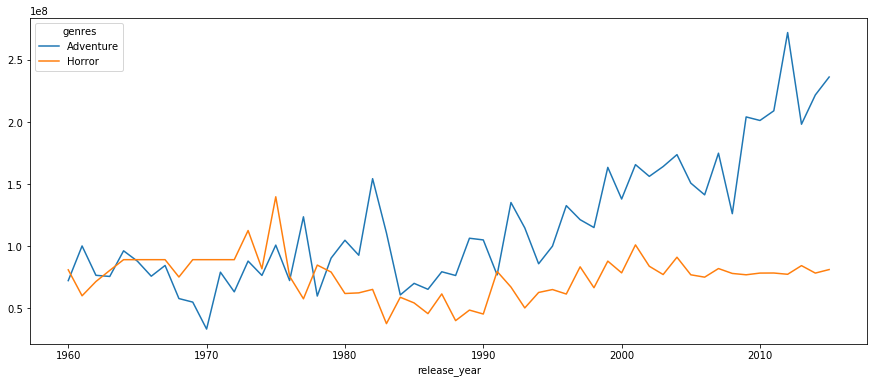

In [319]:
spread_df.query('genres == "Adventure" or genres == "Horror"').groupby(['release_year', 'genres'])['revenue'].mean().unstack().plot(figsize=(15,6));

looks like Adventure movies revenue is higher as well

**Budget and Revenue among genres**

In [320]:
spread_df.query('release_year == 2015').groupby(['genres'])['budget', 'revenue'].mean()

,budget,revenue
genres,,
Action,4.951033e+07,1.777273e+08
Adventure,6.517880e+07,2.362795e+08
Animation,4.427656e+07,1.638711e+08
Comedy,3.230128e+07,9.917246e+07
Crime,4.057312e+07,1.305806e+08
Documentary,2.968253e+07,7.704486e+07
Drama,2.684914e+07,7.709830e+07
Family,5.086454e+07,1.706213e+08
Fantasy,5.312588e+07,1.715952e+08


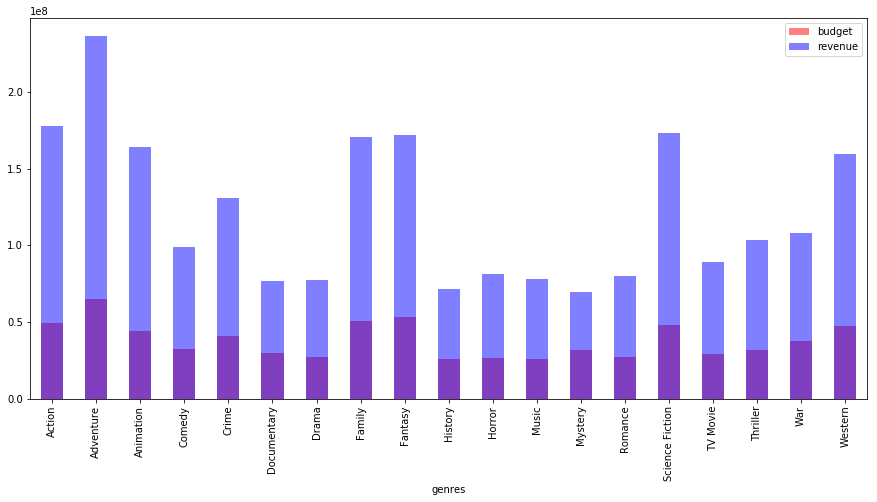

In [321]:
spread_df.query('release_year == 2015').groupby(['genres'])['budget'].mean().plot(kind='bar', alpha=0.5, color='red', figsize=(15,7))
spread_df.query('release_year == 2015').groupby(['genres'])['revenue'].mean().plot(kind='bar', alpha=0.5, color='blue', figsize=(15,7))
plt.legend();

#### Profit among genres

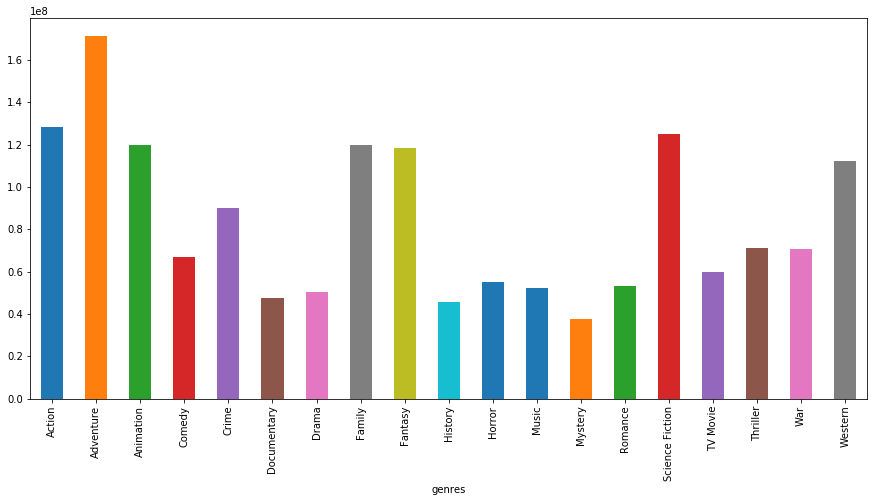

In [322]:
spread_df.query('release_year == 2015').groupby(['genres'])['profit'].mean().plot(kind='bar', figsize=(15,7));

Adventure, Action, Animation, Fantasy, Science Fiction, Family movies are making good profit

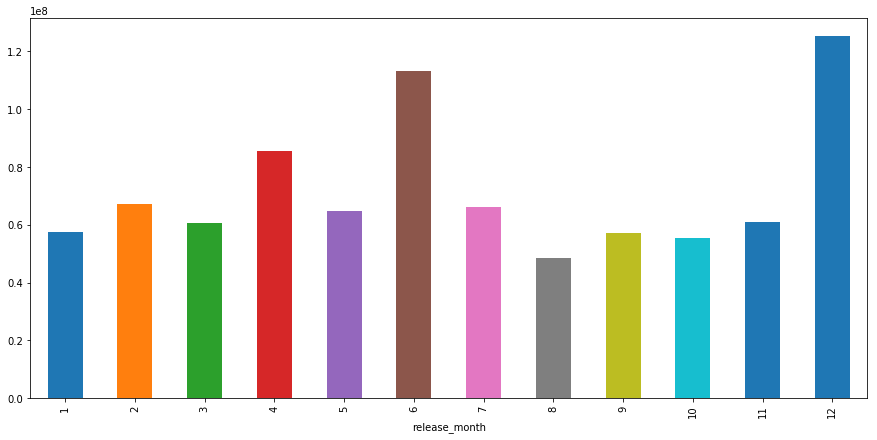

In [323]:
df.query('release_year == 2015').groupby(['release_month'])['profit'].mean().plot(kind='bar', figsize=(15,7));

in 2015, December released movies made more profit just ahead of June which has overall lead when compared over the years.

### Runtime distribution

In [324]:
df.runtime.describe()

count    10835.000000
mean       102.161790
std         31.263769
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

have to remove outliers

**Better way to drop is by applying condition and create new dataframe**

In [327]:
runtime_df = df[df.runtime < 350]

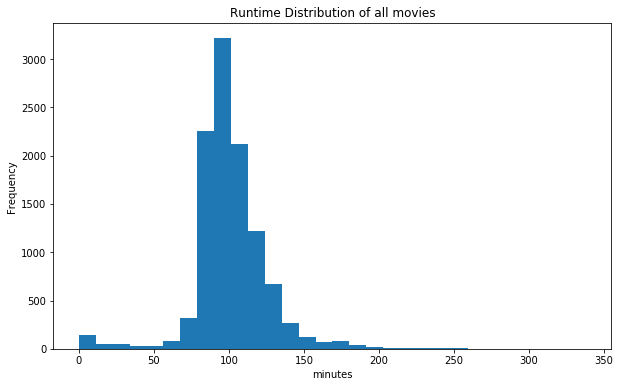

In [328]:
plt.title('Runtime Distribution of all movies')
plt.xlabel('minutes')
runtime_df['runtime'].plot(kind='hist', figsize=(10, 6), bins=30);

most movie runtime is around 90 to 110 minutes.

### What month movies are released most

In [329]:
df['release_month'].value_counts()

9     1328
10    1147
12     981
8      915
1      912
6      826
3      822
11     814
5      808
7      798
4      797
2      687
Name: release_month, dtype: int64

Plotting the above

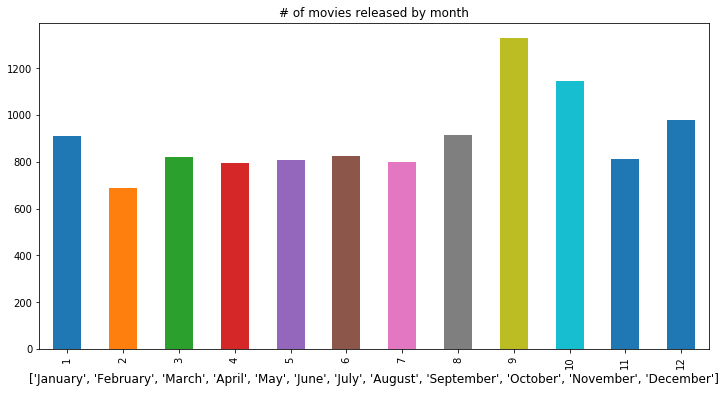

In [330]:
plt.figure()
df['release_month'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6));
Months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.title('# of movies released by month')
plt.xlabel(Months, fontsize=12)
plt.show()

<a id='conclusions'></a>
## Conclusions

So looking at all the investigation done so far, if one were to make a movie I can recommend following:

- **Choose from following production company**
    - Paramount Pictures
    - Universal Pictures
    - Warner Bros
    - Walt Disney Pictures 
    - Metro-Goldwyn-Mayer
    - Columbia Pictures
    - New Line Cinema
    - Touchstone Pictures
    - 20th Century Fox
- **Choose from following genre**
    - Adventure
    - Action
    - Animation
    - Fantasy
    - Science Fiction
    - Family
- Should make movie around **90-110** minutes runtime
- **June and December** have better chances of being successful
- June has lesser movies released but those movies also made more profit